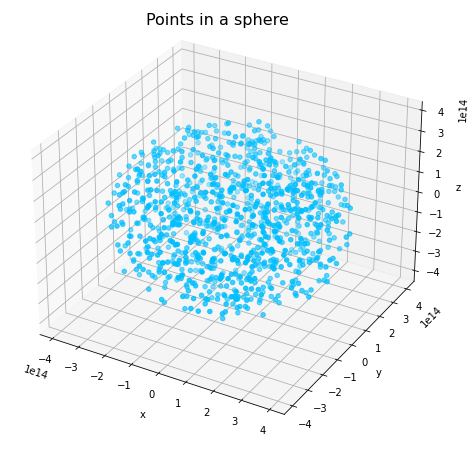

In [43]:
import numpy as np
import matplotlib.pyplot as plt

################################################################################################################

N = 1000 #number of points
a = 40*10**13  #radius of the sphere
t_in = 0
m = 10**31
v_x = np.zeros(N)
v_y = np.zeros(N)
v_z = np.zeros(N)
### FUNCTIONS ##################################################################################################

def r(P, a) :
    return (P * a**3)**(1/3)

def theta(P) :
    return np.arccos(1 - 2*P)

def phi(P) :
    return 2 * np.pi * P

################################################################################################################


# random generated P
# three different ones in order not to be correlated
Pr = np.random.uniform(0, 1, N)
Ptheta = np.random.uniform(0, 1, N)
Pphi = np.random.uniform(0, 1, N)

# polar coordinates
r = r(Pr, a)
theta = theta(Ptheta)
phi = phi(Pphi)

'''
theta=np.arccos(np.random.uniform(-1,1,N))   # Polar
phi = np.pi*np.random.uniform(-1,1,N)        # Azimuthal
psi = np.pi*np.random.uniform(-1,1,N)        # Azimuthal
#iota = np.arccos(np.random.uniform(-1,1,mcn))  # Polar 
'''

# cartesian coordinates
x = r * np.sin(theta) * np.cos(phi)
y = r * np.sin(theta) * np.sin(phi)
z = r * np.cos(theta)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection = '3d')
fig.suptitle("Points in a sphere", fontsize='16', y=0.87)
ax.set_xlabel('\nx')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.scatter(x, y, z, color = 'deepskyblue')
plt.show()

In [44]:
sphere = open("sphere.in", "w")

#sphere.write(str(N) + "\n"+ str(t_in) + "\n")

for i in range(N):
    sphere.write(str(m) + " "+ str(x[i])+ " " + str(y[i])+ " " + str(z[i])+ " " + str(v_x[i])+ " " + str(v_y[i])+ " " + str(v_z[i]))
    if (i != N):
        sphere.write("\n")

#print(sphere.read())

